In [ ]:
import pandas as pd
import numpy as np
import json
import re
from nltk.tokenize import RegexpTokenizer, word_tokenize, sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import drive
drive.mount("/content/gdrive")
import nltk

Mounted at /content/gdrive


In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import pandas as pd
df=pd.read_csv('/content/gdrive/My Drive/NLP/dropped.csv')
%time

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 4.05 µs


In [ ]:
df['NER']=df['NER'].str.replace('[','')
df['NER']=df['NER'].str.replace(']','')
df['NER']=df['NER'].str.replace('"','')
df['NER']=df['NER'].str.replace(',','')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



In [ ]:
df

,Unnamed: 0,title,NER
0,0,No-Bake Nut Cookies,brown sugar milk vanilla nuts butter bite size...
1,1,Jewell Ball'S Chicken,beef chicken breasts cream of mushroom soup so...
2,2,Creamy Corn,frozen corn cream cheese butter garlic powder ...
3,3,Chicken Funny,chicken chicken gravy cream of mushroom soup s...
4,4,Reeses Cups(Candy),peanut butter graham cracker crumbs butter pow...
...,...,...,...
2231137,2231137,Sunny's Fake Crepes,chocolate hazelnut spread tortillas butter mar...
2231138,2231138,Devil Eggs,eggs paprika salt choice miracle whip relish
2231139,2231139,Extremely Easy and Quick - Namul Daikon Salad,radish Sesame oil White sesame seeds Salt Soy ...
2231140,2231140,Pan-Roasted Pork Chops With Apple Fritters,apple cider sugar kosher salt bay leaves arbol...


In [ ]:
df1=df.sample(n=20000)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

no_features = 1000

In [ ]:
vectorizer = CountVectorizer(max_df=0.75, min_df=20, max_features=no_features, stop_words='english') # you can play with that
data_vectorized= vectorizer.fit_transform(df1['NER'])
feature_names =vectorizer.get_feature_names_out()

In [ ]:
# Run LDA
from sklearn.decomposition import NMF, LatentDirichletAllocation
no_topics = 10
lda_model = LatentDirichletAllocation(n_components=no_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0)

In [ ]:
lda_output = lda_model.fit_transform(data_vectorized)

print(lda_model)  # Model attributes

LatentDirichletAllocation(learning_method='online', learning_offset=50.0,
                          max_iter=5, random_state=0)


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Define Search Param
search_params = {'n_components': [ 10, 15, 20], 'learning_decay': [.5, .7, .9]}

# Init the Model
lda1 = LatentDirichletAllocation()

# Init Grid Search Class
model = GridSearchCV(lda1, param_grid=search_params)

# Do the Grid Search
model.fit(data_vectorized)

GridSearchCV(estimator=LatentDirichletAllocation(),
             param_grid={'learning_decay': [0.5, 0.7, 0.9],
                         'n_components': [10, 15, 20]})

In [ ]:
best_lda_model = model.best_estimator_


In [ ]:
print("Model Perplexity: ", best_lda_model.perplexity(data_vectorized))

Model Perplexity:  7471.751210130358


In [ ]:
pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 5.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=ccc13383e95aebc26e139c9f025684455e35a6a753a347f052f313e939c5a128
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis


In [ ]:
# Plotting tools
import pyLDAvis
import pyLDAvis.sklearn
import matplotlib.pyplot as plt
%matplotlib inline

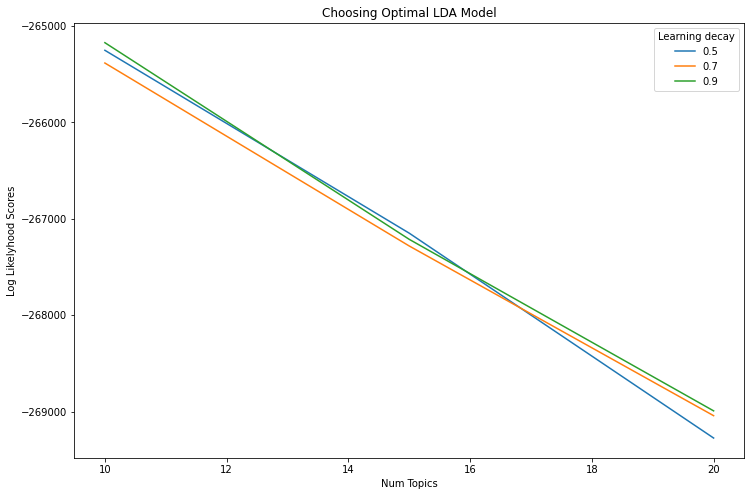

In [ ]:
n_topics = [ 10, 15, 20]
#log_likelyhoods_2 = [round(model.cv_results_['mean_test_score'][index]) for index, gscore in enumerate(model.cv_results_['params']) if gscore['learning_decay']==0.2]
#log_likelyhoods_5 = [round(gscore.mean_validation_score) for gscore in model.cv_results_ if gscore.parameters['learning_decay']==0.5]
log_likelyhoods_5 = [round(model.cv_results_['mean_test_score'][index]) for index, gscore in enumerate(model.cv_results_['params']) if gscore['learning_decay']==0.5]
#log_likelyhoods_7 = [round(gscore.mean_validation_score) for gscore in model.cv_results_ if gscore.parameters['learning_decay']==0.7]
log_likelyhoods_7 = [round(model.cv_results_['mean_test_score'][index]) for index, gscore in enumerate(model.cv_results_['params']) if gscore['learning_decay']==0.7]
#log_likelyhoods_9 = [round(gscore.mean_validation_score) for gscore in model.cv_results_ if gscore.parameters['learning_decay']==0.9]
log_likelyhoods_9 = [round(model.cv_results_['mean_test_score'][index]) for index, gscore in enumerate(model.cv_results_['params']) if gscore['learning_decay']==0.9]

# Show graph
plt.figure(figsize=(12, 8))
plt.plot(n_topics, log_likelyhoods_5, label='0.5')
plt.plot(n_topics, log_likelyhoods_7, label='0.7')
plt.plot(n_topics, log_likelyhoods_9, label='0.9')
plt.title("Choosing Optimal LDA Model")
plt.xlabel("Num Topics")
plt.ylabel("Log Likelyhood Scores")
plt.legend(title='Learning decay', loc='best')
plt.show()

In [ ]:
pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(best_lda_model, data_vectorized, vectorizer, mds='tsne')
panel

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



AssertionError: ignored

In [ ]:
vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
data_vectorized1= vectorizer.fit_transform(df['NER'])

In [ ]:
pyLDAvis.enable_notebook()
panel1 = pyLDAvis.sklearn.prepare(best_lda_model, data_vectorized1, vectorizer, mds='tsne')
panel1

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:827: FutureWarning:

'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming o

PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
1      32.420952   8.115230       1        1  15.496558
8       0.648955  71.707100       2        1  15.032488
0      71.019684   9.971006       3        1  12.306769
7       3.785981  33.185135       4        1  11.969677
4     -42.666500  -9.222070       5        1  10.991462
6      -3.621689 -43.526516       6        1  10.226169
5      -3.632402  -4.171708       7        1   7.791747
9     -36.584400  35.804413       8        1   6.590158
2      44.391380  50.615383       9        1   5.423019
3      40.235809 -31.591665      10        1   4.171953, topic_info=            Term          Freq         Total Category  logprob  loglift
461          jet  6.162020e+05  6.162020e+05  Default  30.0000  30.0000
883       summer  1.100241e+06  1.100241e+06  Default  29.0000  29.0000
248     crackers  5.832850e+05  5.832850e+05  Default  28.0000  28.0000
492         leek  5.121850e+05  5.121850e+05  Default  27.0000  27.0000
599        onion  2.729450e+05  2.729450e+05  Default  26.0000  26.0000
..           ...           ...           ...      ...      ...      ...
942  unsweetened  1.061770e+04  7.389633e+04  Topic10  -4.6926   1.2366
836    sourdough  1.200850e+04  1.267315e+05  Topic10  -4.5695   0.8203
350    flavoring  1.600976e+04  4.545448e+05  Topic10  -4.2819  -0.1693
161    champagne  1.275033e+04  5.354786e+05  Topic10  -4.5095  -0.5608
695      poultry  1.090352e+04  2.474243e+05  Topic10  -4.6660   0.0548

[656 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
0         1  0.012411  _____
0         2  0.020943  _____
0         3  0.012411  _____
0         4  0.217962  _____
0         5  0.006205  _____
...     ...       ...    ...
998       6  0.000528   zest
998       7  0.000103   zest
998       8  0.000088   zest
998       9  0.001173   zest
998      10  0.026992   zest

[4810 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 9, 1, 8, 5, 7, 6, 10, 3, 4])

In [ ]:
import re, nltk, spacy, gensim

/usr/local/lib/python3.7/dist-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning:

`scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.



In [ ]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True)) 

In [ ]:
# Create Document - Topic Matrix
lda_output = best_lda_model.transform(data_vectorized)

# column names
topicnames = ["Topic" + str(i) for i in range(best_lda_model.n_components)]

# index names
docnames = ["Doc" + str(i) for i in range(len(data))]

# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)

# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

# Styling
def color_green(val):
    color = 'green' if val > .1 else 'black'
    return 'color: {col}'.format(col=color)

def make_bold(val):
    weight = 700 if val > .1 else 400
    return 'font-weight: {weight}'.format(weight=weight)

# Apply Style
df_document_topics = df_document_topic.head(15).style.applymap(color_green).applymap(make_bold)
df_document_topics

NameError: ignored

In [ ]:

df_topic_keywords.head()

,accent,acorn,active,adobo,ale,allspice,almond,almonds,american,ancho,...,wraps,xanthan,yeast,yellow,yogurt,yolk,yolks,yucca,zest,zucchini
0,2.404511,1.192736,0.201457,0.201092,0.200001,0.201349,0.200157,6.809682,5.197657,0.209662,...,0.209563,0.200002,0.201023,11.026474,1.153109,1.308887,0.201553,0.200919,0.344519,24.262079
1,0.200019,0.200025,0.200854,0.200007,7.198204,6.849056,0.211115,3.158706,0.200010,0.203735,...,0.200028,0.206980,0.201907,0.200784,0.203094,0.203834,0.200103,2.192559,0.209181,0.201276
2,3.992007,1.202827,0.200941,0.201808,0.201512,1.206295,0.200279,1.420844,0.202326,0.200548,...,0.203641,0.200006,1.278261,15.921440,2.006429,0.202812,0.200565,0.200009,1.354567,0.204058
3,0.200005,0.204403,12.195089,0.200002,0.200001,11.383661,43.188192,25.729474,0.200003,0.200001,...,3.176879,2.192592,47.115668,17.154417,13.030242,1.319258,30.943390,0.200003,15.405218,6.641502
4,0.203459,0.200010,0.201659,2.197092,0.200282,1.359639,0.200257,1.881294,0.200004,4.186054,...,0.209890,0.200420,0.203141,18.696885,15.607126,5.965209,2.454388,0.206511,9.686515,3.691085


In [ ]:
mytext = ["salt onion milk  chicken cream lentels tomatoes"]
best_lda_model.predict(mytext_vect)

AttributeError: ignored

In [ ]:

mytext = "salt onion milk  chicken cream lentels tomatoes"
mytext_vect= vectorizer.fit_transform(mytext)
topic_probability_scores = best_lda_model.transform(mytext_vect)


ValueError: ignored